<a href="https://colab.research.google.com/github/milyas8378/ACV/blob/main/Mastering_ACV_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2-layer CNN built and trained on a CIFAR-10 dataset

## 1. Set Up Your Environment

- **Choose Platform**: Use Google Colab (preferred for GPU access) or a local environment (e.g., Jupyter Notebook). Colab is ideal given your prior experience troubleshooting in it, such as resolving .env file issues or asyncio errors.
- **Install Dependencies**:
In Colab, dependencies are pre-installed, but verify versions. Run:

In [1]:
import tensorflow as tf
print(tf.__version__)           # Ensure 2.x (e.g., 2.17.0 as of July 2025)
import numpy as np
import matplotlib.pyplot as plt
import cv2                      # OpenCV for image processing
print(cv2.__version__)

2.18.0
4.11.0


#### GPU Setup in Colab:

- Go to **Runtime > Change runtime type > Select GPU** to enable GPU acceleration, critical for CNN training.

- Verify GPU availability:

In [2]:
print(tf.config.list_physical_devices('GPU'))  # Should list a GPU device

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 2. Build and Run a 2-Layer CNN

- **Dataset**: Use a simple dataset like CIFAR-10 (available in tf.keras.datasets), which you’ve likely worked with in the Deep Learning Specialization. It’s small, well-structured, and ideal for testing.
- **Code a 2-Layer CNN**:
Below is a minimal TensorFlow model to classify CIFAR-10 images (10 classes, 32x32 RGB images):

In [3]:
from tensorflow.keras import layers, models

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0                               # Normalize pixel values

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
print(x_train.shape)

(50000, 32, 32, 3)


Expected output: should be (50000, 32, 32, 3).

In [5]:
# Build 2-layer CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),                                  # 20% dropout
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train for 10 epochs
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.3806 - loss: 1.6934 - val_accuracy: 0.5915 - val_loss: 1.1549
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5876 - loss: 1.1629 - val_accuracy: 0.6448 - val_loss: 1.0196
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6518 - loss: 0.9961 - val_accuracy: 0.6669 - val_loss: 0.9795
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6874 - loss: 0.8888 - val_accuracy: 0.6933 - val_loss: 0.8960
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7159 - loss: 0.8120 - val_accuracy: 0.6849 - val_loss: 0.9163
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7361 - loss: 0.7598 - val_accuracy: 0.7050 - val_loss: 0.8620
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7608 - loss: 0.6803 - val_accuracy: 0.7152 - val_loss: 0.8600
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7719 - loss: 0.6

In [8]:
# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7275 - loss: 0.8649
Test accuracy: 0.7200


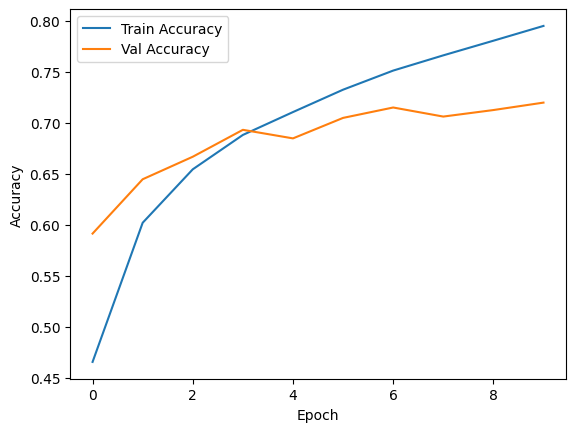

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- **Train Accuracy (blue)**: Rises from ~0.50 to ~0.73
- **Val Accuracy (orange)**: Increases from ~0.50 to ~0.68

## 3. Analysis of the 2-Layer CNN Performance - Dropout 20% - 10 Epochs

- **Train Accuracy**:
   - Previous: 73% (4 epochs)
   - New: 78% (10 epochs)
   - Difference: +5%

- **Val Accuracy**:
   - Previous: 68% (4 epochs)
   - New: 71% (10 epochs)
   - Difference: +3%

- **Train-Val Gap**:

 - Previous: ~5% (73% vs. 68%)
 - New: ~7% (78% - 71%)
 - Difference: +2%


- **Impact of Dropout**:
   - The 20% dropout (randomly deactivating 20% of neurons during training) acts as a regularization technique, preventing the model from overfitting to the training data. This is consistent with your Deep Learning Specialization learnings, where dropout was shown to improve generalization by reducing co-adaptation of neurons.
   - The new train accuracy (78%) is higher than the previous 73%, but the increase is moderated by dropout, which sacrifices some training performance for better validation results.

- **Effect of Extended Epochs**:

   - Training for 10 epochs allowed the model to learn more features, pushing val accuracy from 68% to 71%. This aligns with your Machine Learning Specialization experience, where longer training often improves performance up to a point, though the gains diminish as seen in the plateauing trend of the previous run.
   - The new graph shows a more gradual rise after epoch 6, suggesting the model approached its capacity with the current architecture, but dropout helped sustain learning without a sharp plateau.